In [1]:
path = 'hdfs://orion11:14001/reddit/sampled_reddit'
df = spark.read.json(path)
df.head()

Row(archived=True, author='halftone84', author_cakeday=None, author_flair_css_class=None, author_flair_text=None, body='I read the title and thought of that cheating bitch clown from the glassjaw video', body_html=None, controversiality=0, created=None, created_utc='1309478410', distinguished=None, downs=0, edited='false', gilded=0, id='c22x4bc', link_id='t3_idgji', mod_reports=None, name='t1_c22x4bc', parent_id='t3_idgji', removal_reason=None, replies=None, retrieved_on=1427302517, saved=None, score=1, score_hidden=False, stickied=None, subreddit='AskReddit', subreddit_id='t5_2qh1i', ups=1, user_reports=None)

In [2]:
import spacy 
from textstat.textstat import textstatistics, easy_word_set, legacy_round

In [3]:
# # Splits the text into sentences, using  
# # Spacy's sentence segmentation which can  
# # be found at https://spacy.io/usage/spacy-101 
# def break_sentences(text): 
#     nlp = spacy.load('en') 
#     doc = nlp(text) 
#     return doc.sents 

In [4]:
import textstat

test_data = (
    "Playing games has always been thought to be important to "
    "the development of well-balanced and creative children; "
    "however, what part, if any, they should play in the lives "
    "of adults has never been researched that deeply. I believe "
    "that playing games is every bit as important for adults "
    "as for children. Not only is taking time out to play games "
    "with our children and other adults valuable to building "
    "interpersonal relationships but is also a wonderful way "
    "to release built up tension."
)

score_fre = textstat.flesch_reading_ease(test_data)
print('score_fre:', score_fre)
# textstat.smog_index(test_data)
score_fkr = textstat.flesch_kincaid_grade(test_data)
print('score_fkr:', score_fkr)
# textstat.coleman_liau_index(test_data)
# textstat.automated_readability_index(test_data)
# textstat.dale_chall_readability_score(test_data)
# textstat.difficult_words(test_data)
# textstat.linsear_write_formula(test_data)
score_gfi = textstat.gunning_fog(test_data)
print('score_gfi:', score_gfi)
# textstat.text_standard(test_data)

score_fre: 52.23
score_fkr: 12.8
score_gfi: 12.38


In [5]:
df.createOrReplaceTempView('reddit_data')

In [6]:
# query = '''
# SELECT
#   body
# FROM
#   reddit_data
# WHERE
#   subreddit = "technology"
#   AND
#   body != "[deleted]"
# '''
# text_tech = spark.sql(query)
# text_tech.show()

In [7]:
# text_tech.write.saveAsTable('text_tech')
# !ls -R spark-warehouse

In [8]:
# i = 0
# for row in text_tech.rdd.collect():
#     text = row['body']
#     print(text)
#     i += 1
#     if i == 2:
#         break

In [9]:
# text_tech.take(3)

In [10]:
# text_tech.head().body

In [11]:
# comments = []
# i = 0
# for row in text_tech.rdd.collect():
#     text = row['body']
#     comments.append(text)
#     i += 1
#     if i % 1000 == 0:
#         print('i:', i)

In [12]:
# comments

In [13]:
# score_fre_list = []
# score_fkr_list = []
# score_gfi_list = []
# for text in comments:
#     score_fre = textstat.flesch_reading_ease(text)
#     score_fre_list.append(score_fre)
#     score_fkr = textstat.flesch_kincaid_grade(text)
#     score_fkr_list.append(score_fkr)
#     score_gfi = textstat.gunning_fog(text)
#     score_gfi_list.append(score_gfi)

# score_fre_list

In [14]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
# score_fre_s = pd.Series(score_fre_list)
# score_fre_s.describe()

In [16]:
# score_fkr_s = pd.Series(score_fkr_list)
# score_fkr_s.describe()

In [17]:
# score_gfi_s = pd.Series(score_gfi_list)
# score_gfi_s.describe()

In [18]:
# Flesch reading ease
# https://en.wikipedia.org/wiki/Flesch%E2%80%93Kincaid_readability_tests#Flesch%E2%80%93Kincaid_grade_level
# −146.77 ~ 121.22 ?

# plt.hist(score_fre_list, bins=100, range=(-150, 150))
# plt.xlabel('Flesch reading ease')
# plt.ylabel('counts')
# plt.grid(True)

In [19]:
# Flesch–Kincaid grade level
# https://en.wikipedia.org/wiki/Flesch%E2%80%93Kincaid_readability_tests#Flesch%E2%80%93Kincaid_grade_level
# −3.40 ~ +∞ ?

# plt.hist(score_fkr_list, bins=100, range=(-10, 50))
# plt.xlabel('Flesch–Kincaid grade level')
# plt.ylabel('counts')
# plt.grid(True)

In [20]:
# Gunning fog index
# https://en.wikipedia.org/wiki/Gunning_fog_index

# plt.hist(score_gfi_list, bins=100, range=(-10, 50))
# plt.xlabel('Gunning Fog Index')
# plt.ylabel('counts')
# plt.grid(True)

In [21]:
query = '''
SELECT
  body
FROM
  reddit_data
WHERE
  subreddit = "mac"
  AND
  body != "[deleted]"
'''
text_mac = spark.sql(query)
text_mac.show()

+--------------------+
|                body|
+--------------------+
|does it run os9? ...|
|       How exactly? |
|It's you're. And ...|
|your macbook will...|
|No, it was a whil...|
|Did you know that...|
|...Would I like s...|
|Obvious counter-t...|
|It supports Class...|
|I don't like grow...|
|I have the Belkin...|
|I have personally...|
|I have  13" 2010 ...|
|I bought a 13" mb...|
|I love learning n...|
|Hehe, screenshot,...|
|I've been missing...|
|http://www.apple....|
|Yes, you need the...|
|Yes. Running it o...|
+--------------------+
only showing top 20 rows



In [22]:
query = '''
SELECT
  body
FROM
  reddit_data
WHERE
  subreddit = "windows"
  AND
  body != "[deleted]"
'''
text_win = spark.sql(query)
text_win.show()

+--------------------+
|                body|
+--------------------+
|find said font on...|
|I think people st...|
|I also have this ...|
|RAM is the most c...|
|PIII 863 mhz is t...|
|...control click....|
|pslist will work ...|
|Note: Use this as...|
|Do you use Skype ...|
|Ah HA! I didnt no...|
|You can schedule ...|
|Not to mention wa...|
|That's perfectly ...|
|How would my PC l...|
|  Who makes Windows?|
|Don't think, just...|
|We've got some pr...|
|Does the drive me...|
|Windows xp mode. ...|
|If that home prem...|
+--------------------+
only showing top 20 rows



In [23]:
comments_mac = []
i = 0
for row in text_mac.rdd.collect():
    text = row['body']
    comments_mac.append(text)
    i += 1
    if i % 1000 == 0:
        print('i:', i)

i: 1000
i: 2000
i: 3000
i: 4000
i: 5000
i: 6000
i: 7000
i: 8000
i: 9000
i: 10000
i: 11000
i: 12000
i: 13000
i: 14000
i: 15000
i: 16000
i: 17000
i: 18000
i: 19000
i: 20000
i: 21000
i: 22000
i: 23000
i: 24000
i: 25000
i: 26000
i: 27000
i: 28000
i: 29000
i: 30000
i: 31000
i: 32000
i: 33000
i: 34000
i: 35000
i: 36000
i: 37000
i: 38000
i: 39000


In [24]:
comments_win = []
for row in text_win.rdd.collect():
    text = row['body']
    comments_win.append(text)

In [44]:
# Get three scores and their statistic. 
score_fre_list_mac = []
score_fkr_list_mac = []
score_gfi_list_mac = []
for text in comments_mac:
    score_fre = textstat.flesch_reading_ease(text)
    score_fre_list_mac.append(score_fre)
    score_fkr = textstat.flesch_kincaid_grade(text)
    score_fkr_list_mac.append(score_fkr)
    score_gfi = textstat.gunning_fog(text)
    score_gfi_list_mac.append(score_gfi)

score_fre_s = pd.Series(score_fre_list_mac)
print('fre:\n', score_fre_s.describe())
score_fkr_s = pd.Series(score_fkr_list_mac)
print('fkr:\n', score_fkr_s.describe())
score_gfi_s = pd.Series(score_gfi_list_mac)
print('gfi:\n', score_gfi_s.describe())    

fre:
 count    39827.000000
mean        63.535867
std         72.734586
min      -2755.190000
25%         57.270000
50%         74.190000
75%         87.050000
max        206.840000
dtype: float64
fkr:
 count    39827.000000
mean         9.023949
std         12.219784
min        -15.700000
25%          3.800000
50%          6.800000
75%         10.500000
max        397.800000
dtype: float64
gfi:
 count    39827.000000
mean        10.043832
std          9.092863
min          0.000000
25%          5.200000
50%          8.400000
75%         12.000000
max        235.500000
dtype: float64


In [45]:
score_fre_list_win = []
score_fkr_list_win = []
score_gfi_list_win = []
for text in comments_win:
    score_fre = textstat.flesch_reading_ease(text)
    score_fre_list_win.append(score_fre)
    score_fkr = textstat.flesch_kincaid_grade(text)
    score_fkr_list_win.append(score_fkr)
    score_gfi = textstat.gunning_fog(text)
    score_gfi_list_win.append(score_gfi)

score_fre_s = pd.Series(score_fre_list_win)
print('fre:\n', score_fre_s.describe())
score_fkr_s = pd.Series(score_fkr_list_win)
print('fkr:\n', score_fkr_s.describe())
score_gfi_s = pd.Series(score_gfi_list_win)
print('gfi:\n', score_gfi_s.describe())    

fre:
 count    34539.000000
mean        58.220270
std         87.176654
min      -1993.790000
25%         53.040000
50%         71.140000
75%         84.780000
max        206.840000
dtype: float64
fkr:
 count    34539.000000
mean        10.278277
std         15.041154
min        -15.700000
25%          4.200000
50%          7.400000
75%         11.700000
max        370.700000
dtype: float64
gfi:
 count    34539.000000
mean        11.096701
std         11.486893
min          0.000000
25%          5.600000
50%          8.900000
75%         13.200000
max        380.500000
dtype: float64


In [40]:
len(comments_mac)

39827

In [41]:
len(comments_win)

34539

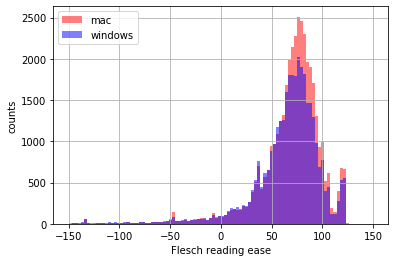

In [54]:
# Flesch reading ease
# https://en.wikipedia.org/wiki/Flesch%E2%80%93Kincaid_readability_tests#Flesch%E2%80%93Kincaid_grade_level
# −146.77 ~ 121.22 ?

plt.hist(score_fre_list_mac, bins=100, range=(-150, 150), alpha=0.5, color='red')
plt.hist(score_fre_list_win, bins=100, range=(-150, 150), alpha=0.5, color='blue')
plt.xlabel('Flesch reading ease')
plt.ylabel('counts')
plt.legend(['mac','windows'])
plt.grid(True)

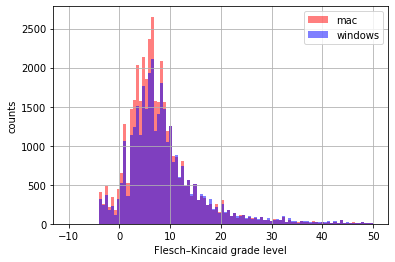

In [55]:
# Flesch–Kincaid grade level
# https://en.wikipedia.org/wiki/Flesch%E2%80%93Kincaid_readability_tests#Flesch%E2%80%93Kincaid_grade_level
# −3.40 ~ +∞ ?

plt.hist(score_fkr_list_mac, bins=100, range=(-10, 50), alpha=0.5, color='red')
plt.hist(score_fkr_list_win, bins=100, range=(-10, 50), alpha=0.5, color='blue')
plt.xlabel('Flesch–Kincaid grade level')
plt.ylabel('counts')
plt.legend(['mac','windows'])
plt.grid(True)

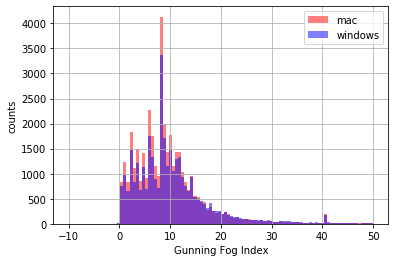

In [56]:
# Gunning fog index
# https://en.wikipedia.org/wiki/Gunning_fog_index

plt.hist(score_gfi_list_mac, bins=100, range=(-10, 50), alpha=0.5, color='red')
plt.hist(score_gfi_list_win, bins=100, range=(-10, 50), alpha=0.5, color='blue')
plt.xlabel('Gunning Fog Index')
plt.ylabel('counts')
plt.legend(['mac','windows'])
plt.grid(True)